In [1]:
import os
os.getcwd()

'C:\\ProgramData\\Anaconda3\\Scripts'

In [2]:
os.chdir("D:/machine learning AZ/titanic")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
training_set = pd.read_csv("D:/machine learning AZ/titanic/train.csv")
test_set = pd.read_csv("D:/machine learning AZ/titanic/test.csv")

In [13]:
training_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
test_set.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
#creates the list of train and test
full_data = [training_set, test_set]

In [11]:
#null count
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
#null count
test_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
print("For embarked in train :")
print(training_set.Embarked.value_counts())
training_set["Embarked"] = training_set["Embarked"].fillna('S')

print("For embarked in test :")
print(test_set.Embarked.value_counts())
test_set["Embarked"] = test_set["Embarked"].fillna('S')

For embarked in train :
S    644
C    168
Q     77
Name: Embarked, dtype: int64
For embarked in test :
S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [12]:
training_set.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [16]:
training_set.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
for dataset in full_data:
    #replace na values in age with mean
    dataset["Age"] = dataset["Age"].fillna(dataset["Age"].mean())
    
    #replace na values in fare with mean
    dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].mean())
    
    #categorizing fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare']= 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare']= 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']= 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    
    # Create new feature FamilySize as a combination of SibSp and Parch
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 20, 'Age']= 0
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 28), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 38), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 38) & (dataset['Age'] <= 60), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 4 ;
    
    #mapping 1 if value of cabin exists else 0 if value is null
    dataset["Cabin"] = dataset.Cabin.isnull()
    dataset["Cabin"] = dataset["Cabin"].astype(int)
    
    
    # Create new feature IsAlone from FamilySize
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    

In [12]:
#get column names
colnamesTrain = list(training_set.columns.values)
print(len(colnamesTrain))

colnamesTest = list(test_set.columns.values)
print(len(colnamesTest))

16
15


In [11]:
training_set.head()

,Survived,Cabin,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Fare_1.0,Fare_2.0,Fare_3.0
0,0,1,2,0,1,0,1,0,1,1,0,0,0,0,0,0
1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,1,1,1,0,0,1,0,1,1,0,0,0,1,0,0
3,1,0,2,0,0,0,1,0,0,0,1,0,0,0,0,1
4,0,1,1,1,1,0,1,0,1,0,1,0,0,1,0,0


In [8]:
drop_elements = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket']
training_set = training_set.drop(drop_elements, axis = 1)
test_set = test_set.drop(drop_elements, axis = 1)

In [40]:
training_set.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,IsAlone
0,0,3,male,1.0,0.0,1,S,2,0
1,1,1,female,2.0,3.0,0,C,2,0
2,1,3,female,1.0,1.0,1,S,1,1
3,1,1,female,2.0,3.0,0,S,2,0
4,0,3,male,2.0,1.0,1,S,1,1


In [10]:
#one hot
training_set = pd.get_dummies(training_set,columns=['Sex','Embarked','Pclass','Age','Fare'],drop_first=True)
test_set = pd.get_dummies(test_set,columns=['Sex','Embarked','Pclass','Age','Fare'],drop_first=True)

In [42]:
training_set.head()

,Survived,Cabin,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Fare_1.0,Fare_2.0,Fare_3.0
0,0,1,2,0,1,0,1,0,1,1,0,0,0,0,0,0
1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,1,1,1,0,0,1,0,1,1,0,0,0,1,0,0
3,1,0,2,0,0,0,1,0,0,0,1,0,0,0,0,1
4,0,1,1,1,1,0,1,0,1,0,1,0,0,1,0,0


In [43]:
test_set.head()

,Cabin,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Fare_1.0,Fare_2.0,Fare_3.0
0,0,1,1,1,1,0,0,1,0,1,0,0,0,0,0
1,0,2,0,0,0,1,0,1,0,0,1,0,0,0,0
2,0,1,1,1,1,0,1,0,0,0,0,1,1,0,0
3,0,1,1,1,0,1,0,1,1,0,0,0,1,0,0
4,0,3,0,0,0,1,0,1,1,0,0,0,1,0,0


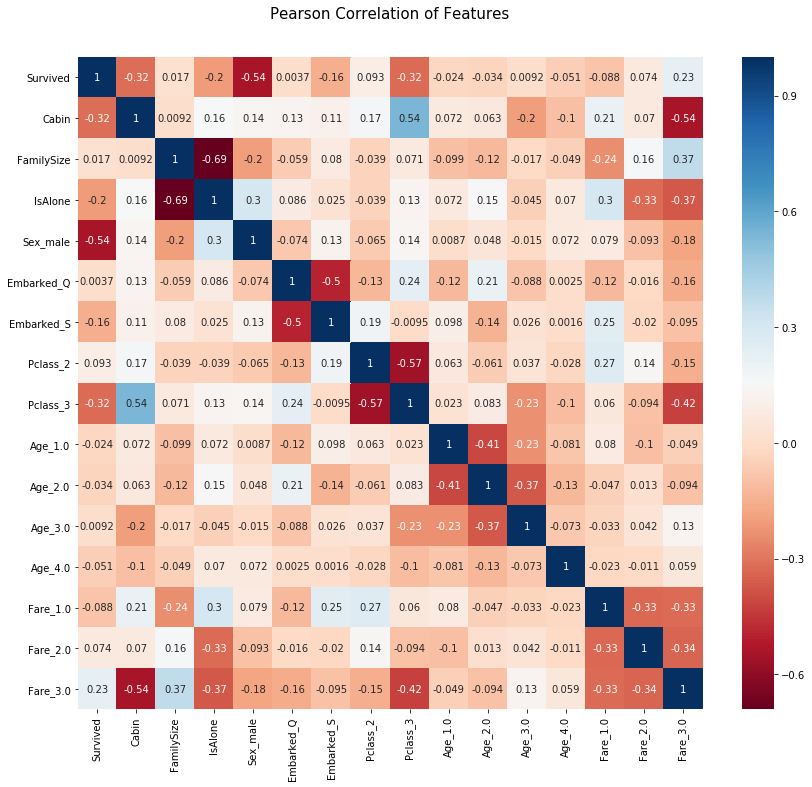

In [13]:
#Pearson Correlation Heatmap
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(training_set.astype(float).corr(), cmap=colormap, linecolor='white', annot=True)

In [55]:
#test train split
from sklearn.model_selection import train_test_split

X=training_set[['Cabin', 'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3', 'Age_1.0', 'Age_2.0', 'Age_3.0', 'Age_4.0', 'Fare_1.0', 'Fare_2.0', 'Fare_3.0']].values
y=training_set[['Survived']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [57]:
#Bagged Decision Trees
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

kfold = model_selection.KFold(n_splits=10, random_state=44)
cart = DecisionTreeClassifier()
num_trees = 200
bagging_decision_tree = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=44)
results = model_selection.cross_val_score(bagging_decision_tree, X_train, y_train.ravel(), cv=kfold)
print("kfold mean accuracy : " , results.mean())

model = bagging_decision_tree.fit(X_train, y_train.ravel())
model.score(X_test,y_test)

kfold mean accuracy :  0.779577464789


0.82681564245810057

In [58]:
#AdaBoost
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
AdaBoost = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(AdaBoost, X_train, y_train.ravel(), cv=kfold)
print(results.mean())


model = AdaBoost.fit(X_train, y_train.ravel())
model.score(X_test,y_test)

0.811854460094


0.79329608938547491

In [59]:
#Stochastic Gradient Boosting

from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
gradientBoosting = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(gradientBoosting, X_train, y_train.ravel(), cv=kfold)
print(results.mean())

model = gradientBoosting.fit(X_train, y_train.ravel())
model.score(X_test,y_test)

0.806181533646


0.81005586592178769

In [61]:
#xgboost

from xgboost import XGBClassifier
classifier = XGBClassifier()


model = classifier.fit(X_train, y_train.ravel())
model.score(X_test,y_test)


0.81005586592178769

In [14]:
# Some useful parameters which will come in handy later on
from sklearn.cross_validation import KFold
ntrain = training_set.shape[0]
ntest = test_set.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [16]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [17]:
# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.cross_validation import KFold

# Create 5 objects that represent our 4 models

rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

In [20]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
y_train = training_set['Survived'].ravel()
training_set = training_set.drop(['Survived'], axis=1)
x_train = training_set.values # Creates an array of the train data
x_test = test_set.values # Creats an array of the test data

In [21]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier

print("Training is complete")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:305: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Training is complete


In [27]:
rf_oof_train.shape

(891, 1)

In [28]:
x_train.shape

(891, 15)

In [29]:
rf_oof_test.shape

(418, 1)

In [30]:
x_test.shape

(418, 15)

In [31]:
#Feature importances generated from the different classifiers
rf_feature = rf.feature_importances(x_train,y_train)
et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gb_feature = gb.feature_importances(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:305: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


[ 0.10623073  0.09850561  0.04318032  0.37847743  0.00904864  0.03434769
  0.02821052  0.13361442  0.01546224  0.01536635  0.01475851  0.00799109
  0.01654532  0.02681039  0.07145074]
[ 0.09545546  0.04708181  0.03686769  0.4845901   0.00932561  0.03539362
  0.02709363  0.11864146  0.01631596  0.01643979  0.01676339  0.00988415
  0.01751598  0.02368202  0.04494933]
[ 0.04   0.24   0.048  0.026  0.012  0.026  0.062  0.09   0.042  0.056
  0.05   0.032  0.052  0.098  0.126]
[ 0.07515988  0.14037961  0.04493811  0.07983099  0.02959893  0.09294307
  0.04133762  0.07869258  0.09210199  0.11292175  0.03835516  0.01072873
  0.07109979  0.05637788  0.0355339 ]


In [32]:
#Second level learning model via XGBoost
x_train = np.concatenate(( et_oof_train, rf_oof_train, ada_oof_train, gb_oof_train, svc_oof_train), axis=1)
x_test = np.concatenate(( et_oof_test, rf_oof_test, ada_oof_test, gb_oof_test, svc_oof_test), axis=1)

In [34]:
import xgboost as xgb
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)

In [42]:
pid = pd.read_csv("D:/machine learning AZ/titanic/test.csv")
pid= pid["PassengerId"]
pid= np.array(pid)

In [44]:
#kaggle submission
# Generate Submission File 
result = pd.DataFrame({ 'PassengerId': pid,
                            'Survived': predictions })


result.to_csv('C:/Users/Thinkpad T540P/Desktop/gender_submission.csv', encoding='utf-8', index=False)


In [45]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
